<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Parametric Distributions  in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Data Analytics: Parametric Distributions

Here's a demonstration of making and general use of parametric distributions in Python. This demonstration is part of the resources that I include for my courses in Spatial / Subsurface Data Analytics at the Cockrell School of Engineering at the University of Texas at Austin.  

#### Parametric Distributions

We will cover the following distributions:

* Uniform
* Triangular
* Gaussian
* Log Normal

We will demonstrate:

* distribution parameters 
* forward and inverse operators
* summary statistics

I have a lecture on these parametric distributions available on [YouTube](https://www.youtube.com/watch?v=U7fGsqCLPHU&t=1687s).   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV_v4.csv at https://git.io/fhHLT.

#### Importing Packages

We will need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import scipy.signal as signal             # kernel for moving window calculation
import random                             # for randon numbers
import seaborn as sns                     # for matrix scatter plots
from scipy import linalg                  # for linear regression
from sklearn import preprocessing
import geostatspy.GSLIB as GSLIB

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [2]:
#os.chdir("c:/PGE383")                     # set the working directory

### Uniform Distribution

Let's start with the most simple distribution.

* by default a random number is uniform distributed

* this ensures that enough random samples (Monte Carlo simulations) will reproduce the distribution

\begin{equation}
x_{\alpha}^{s} = F^{-1}_x(p_{\alpha}), \quad X^{s} \sim F_X
\end{equation}

#### Random Samples

Let's demonstrate the use of the command:

```python
uniform.rvs(size=n, loc = low, scale = interval, random_state = seed)
```

Where:

* size is the number of samples

* loc is the minimum value

* scale is the range, maximum value minus the minimum value

* random_state is the random number seed

We will observe the convergence of the samples to a uniform distribution as the number of samples becomes large.

We will make a compact set of code by looping over all the cases of number of samples

* we store the number of samples cases in the list called ns

* we store the samples as a list of lists, called X_uniform


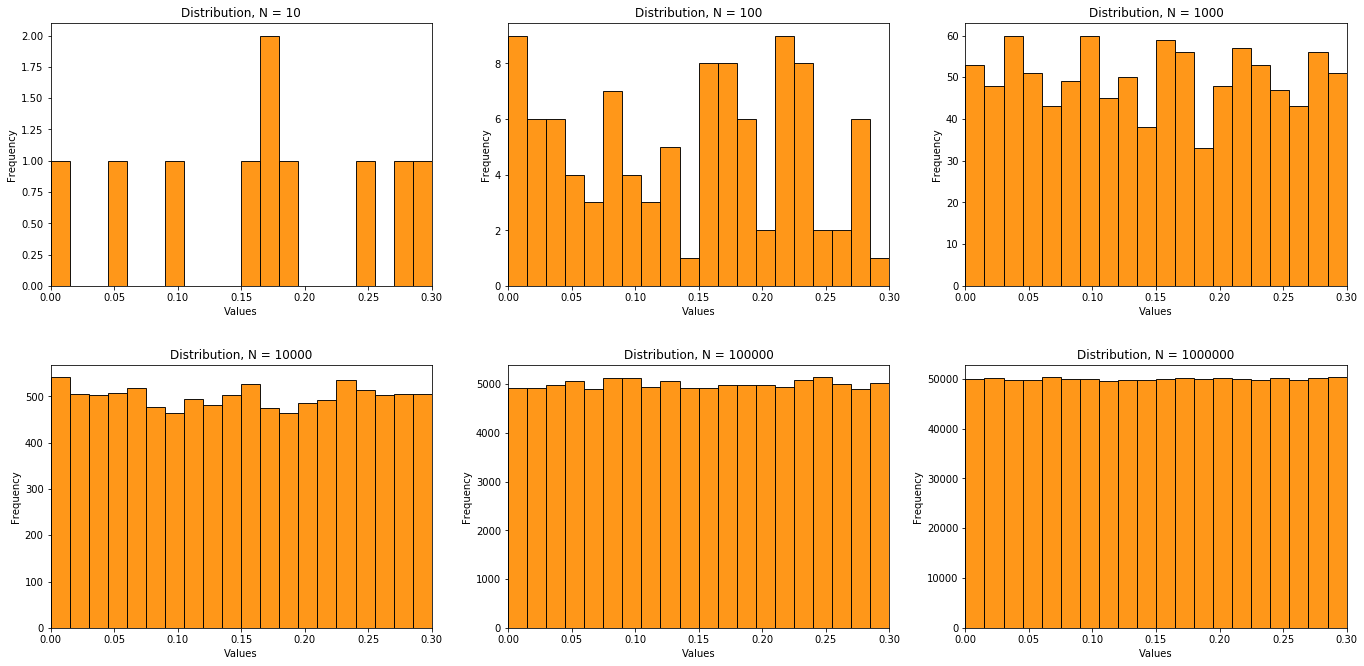

In [5]:
from scipy.stats import uniform

low = 0.00; interval = 0.30; ns = [1e1,1e2,1e3,1e4,1e5,1e6]; X_uniform = []

index = 0
for n in ns:
    X_uniform.append(uniform.rvs(size=int(ns[index]), loc = low, scale = interval).tolist())
    plt.subplot(2,3,index+1)
    GSLIB.hist_st(X_uniform[index],low,low+interval,log=False,cumul = False,bins=20,weights = None,xlabel='Values',title='Distribution, N = ' + str(int(ns[index])))
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.1, wspace=0.2, hspace=0.3)

We can observe that by drawing more Monte Carlo simulations, we more closely approximate the original uniform parametric distribution.

#### Forward Distribution

Let's demonstrate the forward operator. We can take any value and calculate the associated:

* density (probability density function)
* cumulative probability

The transform for the probability density function is:

\begin{equation}
p = f_x(x)
\end{equation}

where $f_x$ is the PDF and $p$ is the density for value, $x$.

and for the cumulative distribution function is:

\begin{equation}
P = F_x(x)
\end{equation}

where $F_x$ is the CDF and $P$ is the cumulative probability for value, $x$.

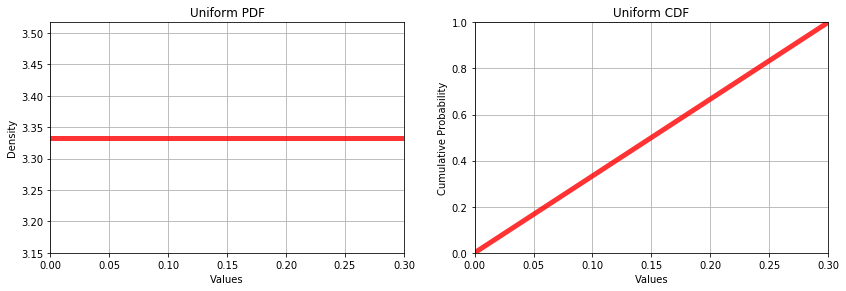

In [20]:
x_values = np.linspace(0.0,0.3,100)
p_values = uniform.pdf(x_values, loc = low, scale = interval)
P_values = uniform.cdf(x_values, loc = low, scale = interval)

plt.subplot(1,2,1)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform PDF'); plt.title('Uniform PDF'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.3]); plt.grid()

plt.subplot(1,2,2)
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8, label='uniform CDF'); plt.title('Uniform CDF'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.3]); plt.ylim([0,1]); plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.8, wspace=0.2, hspace=0.3); plt.show()

#### Inverse Distribution

Let's know demonstrate the reverse operator for the uniform distribution:

\begin{equation}
X = F^{-1}_X(P)
\end{equation}

In [13]:
p = 0.90
x = uniform.ppf(p, loc = low, scale = interval)
print('The P' + str(round(p*100)) + ' of our uniform distribution is ' + str(x) + '.')

The P90 of our uniform distribution is 0.27.


Let's repeat this over a range of percentile values, plot and compare to the forward operation result above.

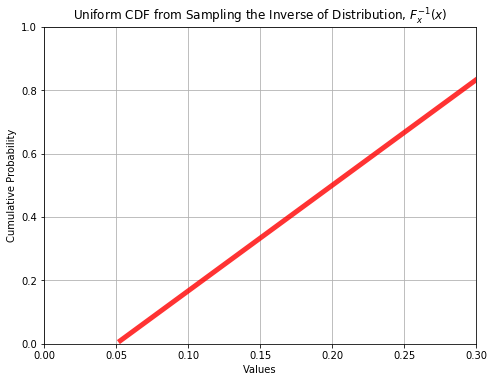

In [32]:
p_values = np.linspace(0.01,0.99,100)
x_values = uniform.ppf(p_values, loc = low, scale = interval)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf');  plt.title('Uniform CDF from Sampling the Inverse of Distribution, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.3]); plt.ylim([0,1]); plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

That work's the plots are the same.

#### Summary Statistics

We also have a couple of convience member functions to return the statistics from the parametric distribution:

* mean
* median
* mode
* variance
* standard deviation

Let's demonstrate a few of these methods.

```python
uniform.stats(loc = low, scale = interval, moments = 'mvsk')
```

returns a tuple with the mean, variance, skew and kurtosis (centered 1st, 2nd, 3rd and 4th moments)

In [22]:
print('Stats: mean, variance, skew and kurtosis = ' + str(uniform.stats(loc = low, scale = interval, moments = 'mvsk')))

Stats: mean, variance, skew and kurtosis = (array(0.15), array(0.0075), array(0.), array(-1.2))


We can confirm this by calculating the centered variance (regular variance) with this member function:

```python
uniform.var(loc = low, scale = interval)
```

In [23]:
print('The variance is ' + str(round(uniform.var(loc = low, scale = interval),4)) + '.')

The variance is 0.0075.


We can also directly calculate the:

* standard deviation - std
* mean - mean
* median - median

We can also calculate order of a non-centered moment. The moment method allows us to calculate an non-centered moment of any order. Try this out.

In [24]:
m_order = 4
print('The ' + str(m_order) + 'th order non-centered moment is ' + str(uniform.moment(n = m_order, loc = low, scale = interval)))

The 4th order non-centered moment is 0.00162


#### Symmetric Interval

We can also get the symmetric interval (e.g. prediction or confidence intervals) for any alpha level. 

* Note the program mislabels the value as alpha, it is actually the significance level (1 - alpha)

In [27]:
level = 0.95
print('The interval at alpha level ' + str(round(1-level,3)) + ' is ' + str(np.round(uniform.interval(alpha = level,loc = low,scale = interval),2)))

The interval at alpha level 0.05 is [0.01 0.29]


#### Triangular Distribution

The great thing about parametric distributions is that the above member functions are the same!

* we can plug and play other parametric distributions and repeat the above.

This time we will make it much more compact!  

* we will import the triangular distribution as my_dist and call the same functions as before
* we need a new parameter, the distribution mode (c parameter)

The mean is 0.17.
The variance is 0.0042.
The interval at an alpha level of 0.05 is [0.07 0.31]


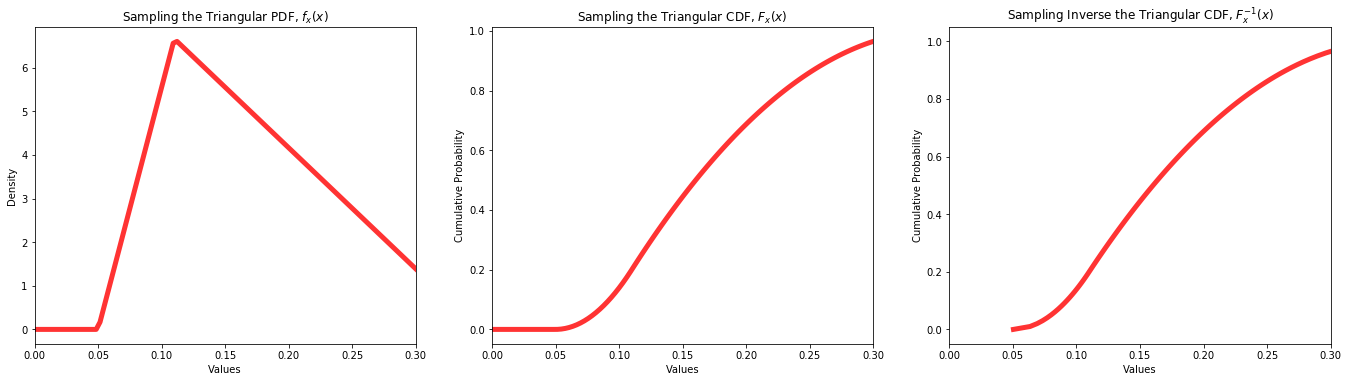

In [42]:
from scipy.stats import triang as my_dist                                    # import traingular dist as my_dist
dist_type = 'Triangular'                                                     # give the name of the distribution for labels
low = 0.05; mode = 0.20; c = 0.10                                            # given the distribution parameters

x_values = np.linspace(0.0,0.3,100)                                          # get an array of x values
p_values = my_dist.pdf(x_values, loc = low, c = mode, scale = interval)      # calculate density for each x value
P_values = my_dist.cdf(x_values, loc = low, c = mode, scale = interval)      # calculate cumulative probablity for each x value

plt.subplot(1,3,1)                                                           # plot the resulting PDF
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.3])

plt.subplot(1,3,2)                                                           # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.3])

p_values = np.linspace(0.00001,0.99999,100)                                 # get an array of p-values
x_values = my_dist.ppf(p_values, loc = low, c = mode, scale = interval)      # apply inverse to get x values from p-values
plt.subplot(1,3,3)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')
plt.xlim([0.0,0.3])

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.title('Sampling Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

print('The mean is ' + str(round(my_dist.mean(loc = low,c = mode, scale = interval),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(loc = low, c = mode, scale = interval),4)) + '.')
print('The interval at an alpha level of ' + str(round(1-level,3)) + ' is ' + str(np.round(my_dist.interval(alpha = level,loc = low,c = mode,scale = interval),2)))

The missing lower tail for the inverse is due to any value less than 0.05 having 0.0 cumulative probability.

#### Gaussian Distribution

Let's now use the Gaussian parametric distribution.

* we will need the parameters mean and the variance

We will apply the forward and reverse operations and calculate the summary statistics.


The mean is 0.15.
The variance is 0.0025.
The interval at an alpha level of 0.05 is [0.05 0.25]


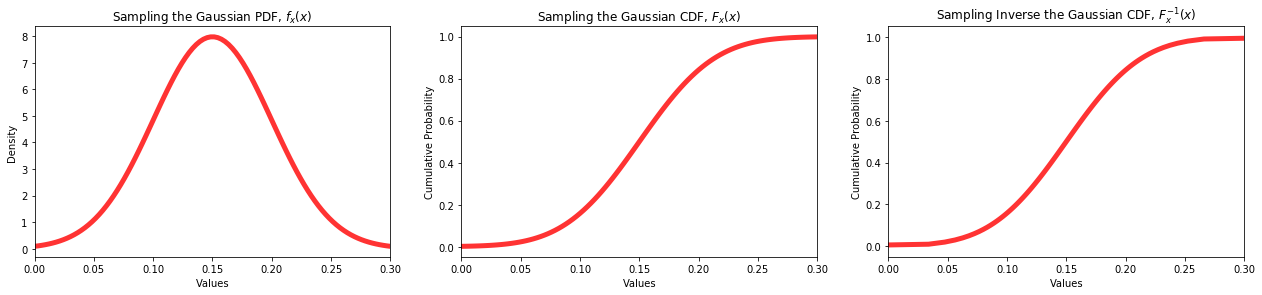

In [46]:
from scipy.stats import norm as my_dist                                      # import traingular dist as my_dist
dist_type = 'Gaussian'                                                       # give the name of the distribution for labels
mean = 0.15; stdev = 0.05                                                    # given the distribution parameters

x_values = np.linspace(0.0,0.3,100)                                          # get an array of x values
p_values = my_dist.pdf(x_values, loc = mean, scale = stdev)                  # calculate density for each x value
P_values = my_dist.cdf(x_values, loc = mean, scale = stdev)                  # calculate cumulative probablity for each x value

plt.subplot(1,3,1)                                                           # plot the resulting PDF
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.3])

plt.subplot(1,3,2)                                                           # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.3])

p_values = np.linspace(0.00001,0.99999,100)                                  # get an array of p-values
x_values = my_dist.ppf(p_values, loc = mean, scale = stdev)                  # apply inverse to get x values from p-values
plt.subplot(1,3,3)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')
plt.xlim([0.0,0.3])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.8, top=0.8, wspace=0.2, hspace=0.3); plt.title('Sampling Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

print('The mean is ' + str(round(my_dist.mean(loc = mean, scale = stdev),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(loc = mean, scale = stdev),4)) + '.')
print('The interval at an alpha level of ' + str(round(1-level,3)) + ' is ' + str(np.round(my_dist.interval(alpha = level,loc = mean,scale = stdev),2)))

#### Log Normal Distribution

Now let's check out the log normal distribution.  

* We need the parameters $\mu$ and $\sigma$

The mean is 0.102.
The variance is 0.0004.
The interval at alpha level 0.05 is [0.07 0.15]


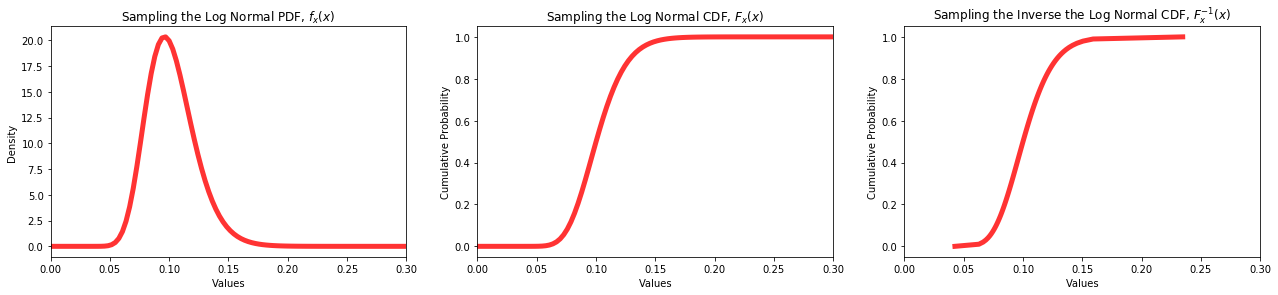

In [48]:
from scipy.stats import lognorm as my_dist                                   # import traingular dist as my_dist
dist_type = 'Log Normal'                                                     # give the name of the distribution for labels
mu = np.log(0.10); sigma = 0.2                                               # given the distribution parameters

x_values = np.linspace(0.0,0.3,100)                                          # get an array of x values
p_values = my_dist.pdf(x_values, s = sigma, scale = np.exp(mu))              # calculate density for each x value
P_values = my_dist.cdf(x_values, s = sigma, scale = np.exp(mu))              # calculate cumulative probablity for each x value

plt.subplot(1,3,1)                                                           # plot the resulting PDF
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')
plt.xlim([0.0,0.3])

plt.subplot(1,3,2)                                                           # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')
plt.xlim([0.0,0.3])

p_values = np.linspace(0.00001,0.99999,100)                                        # get an array of p-values
x_values = my_dist.ppf(p_values,  s = sigma, scale = np.exp(mu))             # apply inverse to get x values from p-values
plt.subplot(1,3,3)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')
plt.xlim([0.0,0.3])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.8, top=0.8, wspace=0.2, hspace=0.3); plt.title('Sampling the Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

print('The mean is ' + str(round(my_dist.mean(s = sigma, scale = np.exp(mu)),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(s = sigma, scale = np.exp(mu)),4)) + '.')
print('The interval at alpha level ' + str(round(1-level,3)) + ' is ' + str(np.round(my_dist.interval(alpha = level,s = sigma, scale = np.exp(mu)),2)))

There are many other parametric distributions that we could have included.  Also we could have demonstrated the distribution fitting. 

#### Comments

This was a basic demonstration of working with parametric distributions. 

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at [Python Demos](https://github.com/GeostatsGuy/PythonNumericalDemos) and a Python package for data analytics and geostatistics at [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
